In [109]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [110]:
%run api_binancePrice.ipynb
# import binancePrice

1     object
2     object
3     object
4     object
5     object
6      int64
7     object
8      int64
9     object
10    object
dtype: object


In [111]:
df = pd.read_csv('binance_ETHEUR.csv')
df['datetime'] = pd.to_datetime(df.datetime,format='%Y-%m-%d %H:%M:%S')
df.index = df['datetime']

In [112]:
df.dtypes

datetime           datetime64[ns]
open                      float64
high                      float64
low                       float64
close                     float64
volume                    float64
close_time                  int64
asset_volume              float64
trade_number                int64
taker_buy_base            float64
taker_buy_quote           float64
dtype: object

In [113]:
df.tail(3)

,datetime,open,high,low,close,volume,close_time,asset_volume,trade_number,taker_buy_base,taker_buy_quote
datetime,,,,,,,,,,,
2020-10-08 16:00:00,2020-10-08 16:00:00,294.48,298.7,292.95,298.7,217.11933,1602169199999,64199.209964,338,168.18394,49737.617948
2020-10-08 17:00:00,2020-10-08 17:00:00,298.75,299.0,297.23,298.0,97.35085,1602172799999,29048.374632,148,76.70305,22893.253386
2020-10-08 18:00:00,2020-10-08 18:00:00,298.00,300.0,298.00,300.0,174.50888,1602176399999,52188.674756,64,174.30914,52128.880589


<function matplotlib.pyplot.show(close=None, block=None)>

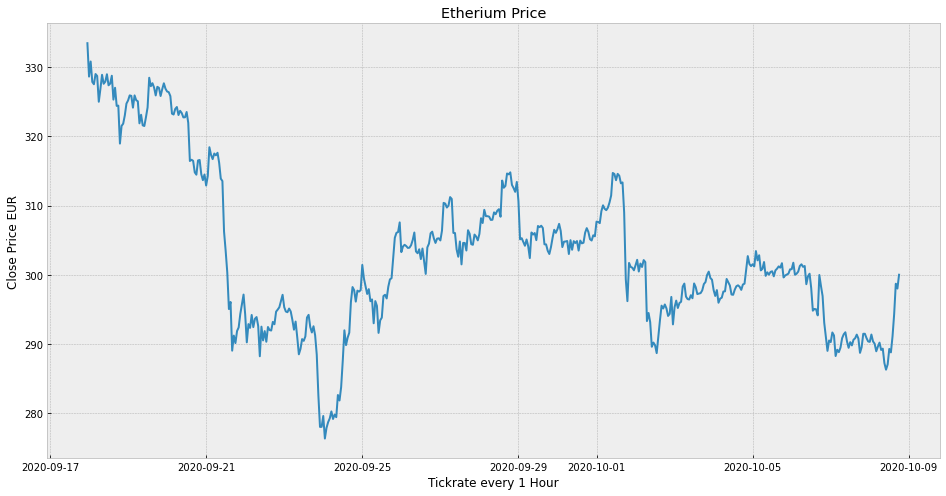

In [144]:
#visualize
plt.figure(figsize=(16,8))
plt.title('Etherium Price')
plt.xlabel('Tickrate every 1 Hour')
plt.ylabel('Close Price EUR')
plt.plot(df['close'])
plt.show

In [145]:
# get the close price only
df = df[['close']]
df.head()

,close
datetime,
2020-09-17 23:00:00,333.49
2020-09-18 00:00:00,328.66
2020-09-18 01:00:00,330.84
2020-09-18 02:00:00,327.89
2020-09-18 03:00:00,327.55


In [146]:
#create a variable to predict 'x' periods into the future
future_period = 25
#create a new column (target) shifted 'x' units up
df['Prediction'] = df[['close']].shift(-future_period)

In [147]:
df.head()

,close,Prediction
datetime,,
2020-09-17 23:00:00,333.49,325.21
2020-09-18 00:00:00,328.66,325.94
2020-09-18 01:00:00,330.84,325.87
2020-09-18 02:00:00,327.89,324.17
2020-09-18 03:00:00,327.55,325.94


In [148]:
#create the feature data set (x) and convert it to numpy array and remove the last 'x' rows/units
# x= np.array(df.drop(['Prediction'],1))[:-future_min]
x=np.array(df[['close']])[:-future_period]
len(x)

475

In [149]:
#create the target data set (y) and convert it to numpy array and get all of the target values except the last 'x' rows
y = np.array(df[['Prediction']])[:-future_period]
len(y)

475

In [150]:
# option 1: split the data into 75% training and 25% testing randomly?
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [151]:
print(len(x_test))
print(len(x_train))
print(len(y_test))
print(len(y_train))

95
380
95
380


In [152]:
#create the models
#create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train,y_train)
#create the linear regression model
lr = LinearRegression().fit(x_train,y_train)

In [153]:
# get the last 'x' rows of the feature data set
x_future = df.drop(['Prediction'],1)[:-future_period]
x_future = x_future.tail(future_period)
x_future = np.array(x_future)

In [154]:
#show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
#show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[288.7  289.52 302.01 291.46 290.84 293.18 290.44 288.77 294.29 290.02
 288.93 283.75 290.18 289.12 289.31 298.   294.29 287.03 289.27 288.77
 298.2  294.31 298.7  298.   300.  ]
[[299.34822467]
 [298.36463398]
 [297.46764875]
 [295.07981223]
 [293.8054746 ]
 [292.5620675 ]
 [293.48998325]
 [293.34770283]
 [294.20757142]
 [293.94156891]
 [292.09810962]
 [292.66104518]
 [292.45071761]
 [292.85281443]
 [293.69412471]
 [294.04673269]
 [294.22612974]
 [293.40956388]
 [292.83425612]
 [293.34151673]
 [293.05076979]
 [293.5580304 ]
 [293.68793861]
 [294.01580217]
 [293.66319419]]


In [155]:
x.shape[0]

475

In [156]:
df

,close,Prediction
datetime,,
2020-09-17 23:00:00,333.49,325.21
2020-09-18 00:00:00,328.66,325.94
2020-09-18 01:00:00,330.84,325.87
2020-09-18 02:00:00,327.89,324.17
2020-09-18 03:00:00,327.55,325.94
...,...,...
2020-10-08 14:00:00,291.10,NaN
2020-10-08 15:00:00,294.31,NaN
2020-10-08 16:00:00,298.70,NaN


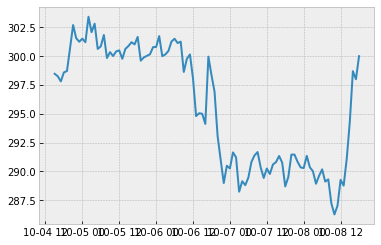

In [162]:
plt.plot(df['close'][400:])

E:\AnacondA\envs\matrixai\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


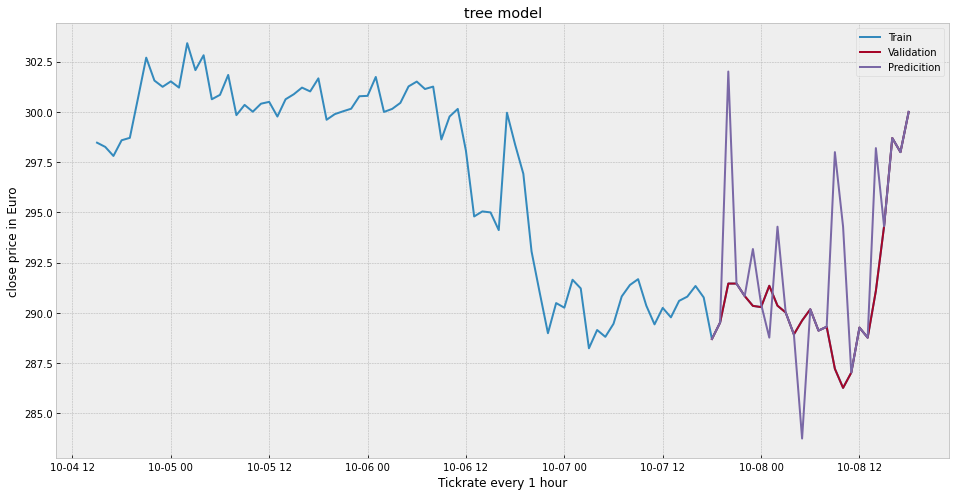

In [157]:
#visualize
predictions = tree_prediction

valid = df[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('tree model')
plt.xlabel('Tickrate every 1 hour')
plt.ylabel('close price in Euro')
plt.plot(df['close'][400:])
plt.plot(valid[['close','Predictions']])
plt.legend(['Train','Validation','Predicition'])
plt.show()

E:\AnacondA\envs\matrixai\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


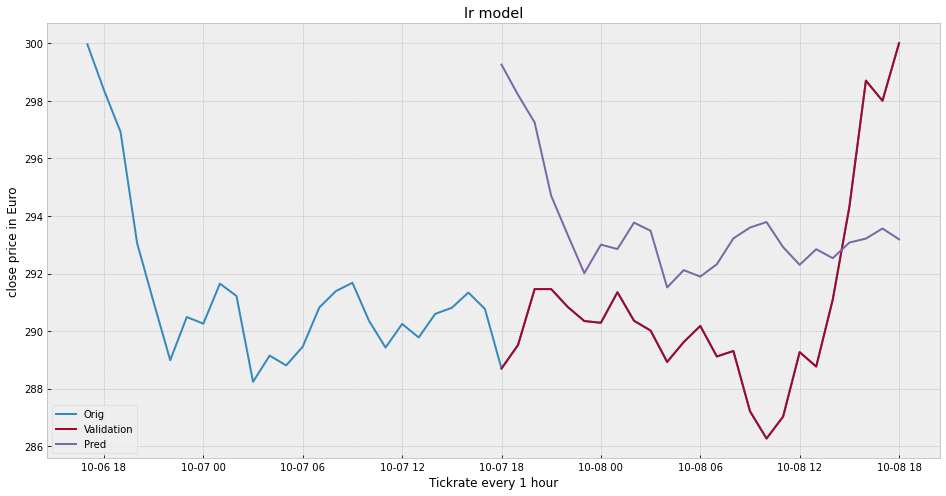

In [143]:
#visualize
predictions = lr_prediction

valid = df[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('lr model')
plt.xlabel('Tickrate every 1 hour')
plt.ylabel('close price in Euro')
plt.plot(df['close'][450:])
plt.plot(valid[['close','Predictions']])
plt.legend(['Orig','Validation','Pred'])
plt.show()